# Interpolation Exercise
Marco Boscato: 2096921

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
# import data
data = np.genfromtxt('data/G01_2070_2_900s_GMAT.txt')
print(data.shape)

# divide in time, position and velocity
time = data[:,1]
position = data[:,2:5]
velocity = data[:,5:8]

JD = 2458736.5

(97, 8)


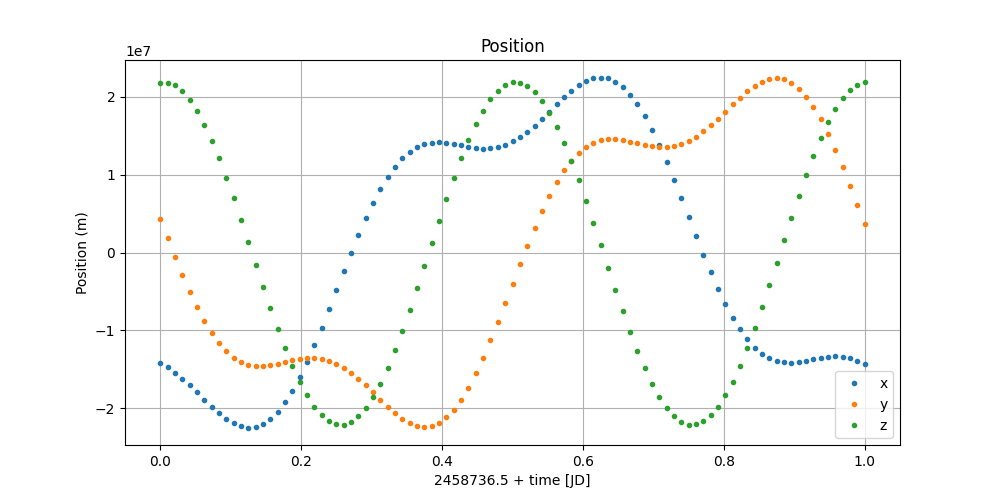

In [3]:
# plot position
plt.figure(figsize=(10,5))
plt.plot(time, position, '.', markersize=6)
plt.xlabel(f'{JD} + time [JD]')
plt.ylabel('Position (m)')
plt.legend(['x', 'y', 'z'])
plt.title('Position')
plt.grid()

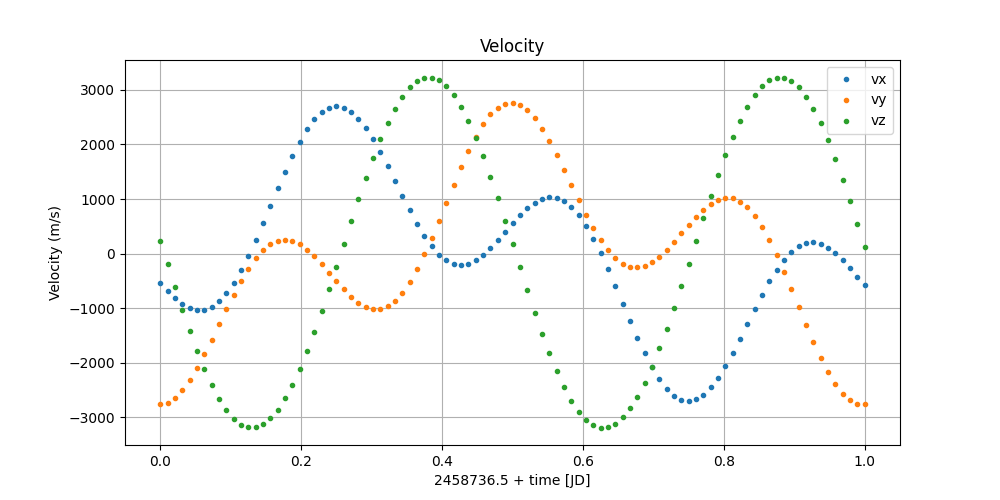

In [4]:
# plot velocity
plt.figure(figsize=(10,5))
plt.plot(time, velocity, '.', markersize=6)
plt.xlabel(f'{JD} + time [JD]')
plt.ylabel('Velocity (m/s)')
plt.legend(['vx', 'vy', 'vz'])
plt.title('Velocity')
plt.grid()

### Interpolation
In this case, if we want to increase the accuracy of the data, we can use the Cubic Spline interpolation method, since we use the data points as the knots of the spline, where each segment of the spline curve is a cubic polynomial with smooth junctions. This results in less tendency to oscillate between data points. Between knots $i$ and $i+1$ we use a cubic polynomial that spans the segment. This allows us to generate more points between the original data by dividing the time period for 1440 intervals ($60s$ interval in a day) and then calculating each new point with the interpolated function found previously.

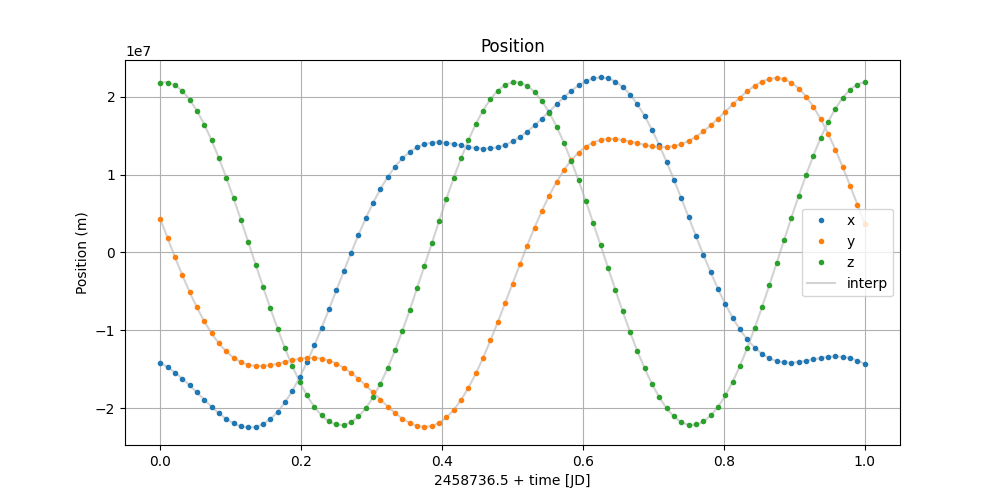

In [5]:
# interpolation
from scipy.interpolate import CubicSpline
cs = CubicSpline(time, position)
time_new = np.linspace(time[0], time[-1], 1440) # 1440 points (1 minute intervals)
position_new = cs(time_new)


# plot the interpolated position
plt.figure(figsize=(10,5))
plt.plot(time, position, '.', markersize=6)
plt.plot(time_new, position_new, color='lightgrey', label='interpolation', zorder=0)
plt.xlabel(f'{JD} + time [JD]')
plt.ylabel('Position (m)')
plt.legend(['x', 'y', 'z', 'interp'], loc='best')
plt.title('Position')
plt.grid()

now the same with velocity

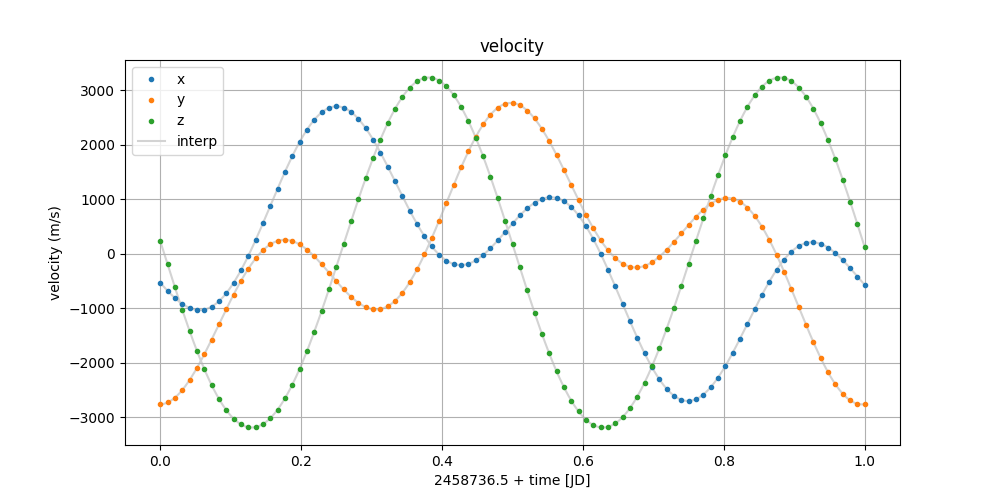

In [6]:
# interpolation
cs = CubicSpline(time, velocity)
velocity_new = cs(time_new)

# plot the interpolated position
plt.figure(figsize=(10,5))
plt.plot(time, velocity, '.', markersize=6)
plt.plot(time_new, velocity_new, color='lightgrey', label='interpolation', zorder=0)
plt.xlabel(f'{JD} + time [JD]')
plt.ylabel('velocity (m/s)')
plt.legend(['x', 'y', 'z', 'interp'], loc='best')
plt.title('velocity')
plt.grid()

now let's generate the update text file 

In [7]:
# save the interpolated data

JD_array = np.full((1440,), JD)
#np.savetxt('data/G01_2070_2_900s_GMAT_interpolated.txt', np.column_stack((JD_array, time_new, position_new, velocity_new)), header='JD time(JD) x y z vx vy vz', fmt='%1.6f')

### plotting the orbit

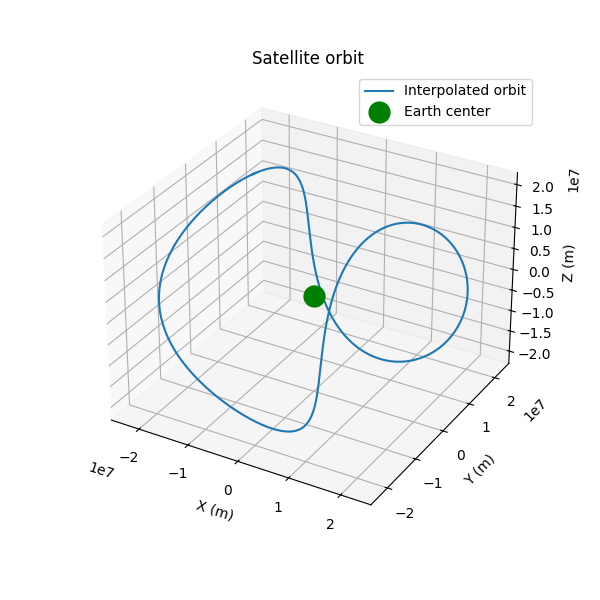

In [9]:
# 3D plot
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(position_new[:,0], position_new[:,1], position_new[:,2], label='Interpolated orbit')
ax.plot([0], [0], [0], 'go',  markersize=15, label='Earth center')    # plot the origin (earth center)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('Satellite orbit')
ax.legend()
#plt.tight_layout()
plt.show()